In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.cluster.hierarchy import linkage,dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler


In [2]:
usa = pd.read_csv("USArrests.csv").set_index('Unnamed: 0')

In [3]:
scaler = StandardScaler().set_output(transform='pandas')
usa_scaled = scaler.fit_transform(usa)

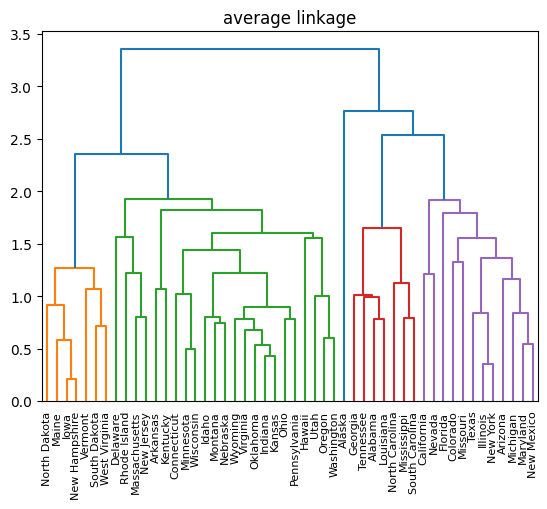

In [4]:
link='average'
mergings = linkage(usa_scaled,method=link)
dendrogram(mergings,labels=list(usa_scaled.index))
plt.title(link + " linkage")
plt.xticks(rotation=90)
plt.show()

In [5]:
scores = []
n_clust = [2,3,4,5,6]
for i in n_clust:
    clust = AgglomerativeClustering(n_clusters=i, linkage='average')
    clust.fit(usa_scaled)
    scores.append(silhouette_score(usa_scaled,clust.labels_))

print(scores)
i_max = np.argmax(scores)
print('Best no of cluster : ',n_clust[i_max])

[0.4084890326217641, 0.34863679190476177, 0.3636819420151221, 0.3212682619092323, 0.2719787783719339]
Best no of cluster :  2


In [6]:
clust = AgglomerativeClustering(n_clusters=2, linkage='average')
clust.fit(usa_scaled)
clust.labels_

print(silhouette_score(usa_scaled,clust.labels_))


0.4084890326217641


In [7]:

df_clust = pd.DataFrame({'city':list(usa_scaled.index),
                         'cluster': list(clust.labels_)}).sort_values(by='cluster')

In [8]:
df_clust['cluster'].value_counts()

cluster
1    30
0    20
Name: count, dtype: int64